Boston House Prediction Has 14 attributes for homes in Boston.
Information related to the Attributes:
- CRIM       per captia crime rate by town
- ZN         proportion of residential land zoned for lots over 25000 sq.ft
- INDUS      proportion of non-retail business acres per town 
- CHAS       Charles River dummy variable(=1 if tract bounds river ; 0 otherwise)
- NOX        nitric oxides concentration(parts per 10 million)
- RM         average number of rooms per dwelling
- AGE        proportion of owner-occupied units built prior to 1940
- DIS        weighted distances to five Boston employment centres
- RAD        index of accessibility to radial highways
- TAX        full value property-tax rate per $10000


- PTRATIO    pupil-teacher ration by town
- B          1000(BK -0.63)^2 where Bk is the proportion of blacks by town.
- LSTAT      % lower status of the population
- MEDV       Median value of owner-occupied homes in $1000's


In [1]:
#REQUIRED LIBRARIES
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.datasets


In [2]:
#LOADING THE DATASET
boston_hpp= pd.read_csv('boston.csv')
boston_hpp.sample(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
373,11.10810,0.0,18.10,0,0.668,4.906,100.0,1.1742,24,666.0,20.2,396.90,34.77,13.8
259,0.65665,20.0,3.97,0,0.647,6.842,100.0,2.0107,5,264.0,13.0,391.93,6.90,30.1
119,0.14476,0.0,10.01,0,0.547,5.731,65.2,2.7592,6,432.0,17.8,391.50,13.61,19.3
417,25.94060,0.0,18.10,0,0.679,5.304,89.1,1.6475,24,666.0,20.2,127.36,26.64,10.4
193,0.02187,60.0,2.93,0,0.401,6.800,9.9,6.2196,1,265.0,15.6,393.37,5.03,31.1


In [3]:
#DATATYPE INFORMATION
boston_hpp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


NON-NULL VALUES IN EVERY COLUMN : NO MISSING DATA 

In [4]:
#STATISTICAL INFORMATION
boston_hpp.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [5]:
boston_hpp.shape

(506, 14)

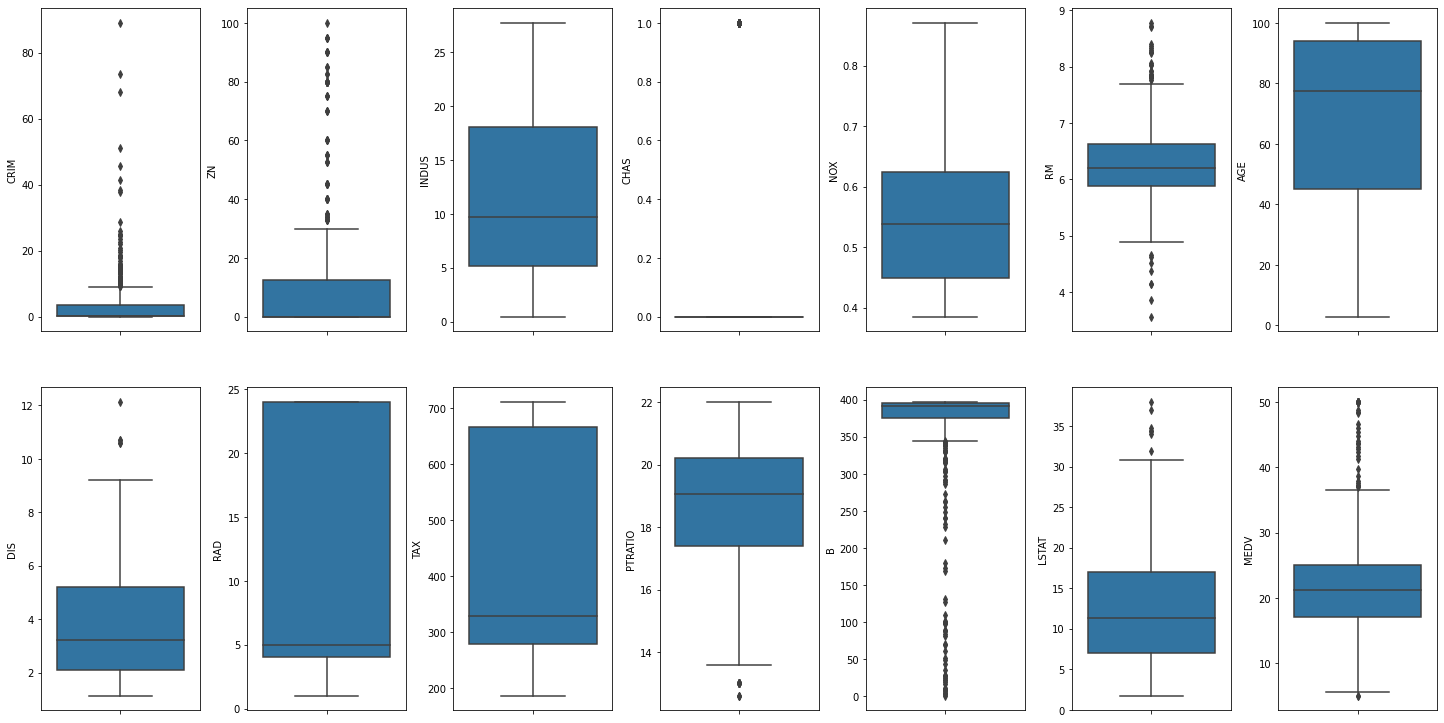

In [17]:
# EXPLORATORY DATA ANALYSIS
fig, ax = plt.subplots(ncols=7,nrows=2,figsize=(20,10))
index = 0
ax= ax.flatten()

for col,value in boston_hpp.items():
    sns.boxplot(y=col,data= boston_hpp, ax=ax[index])
    index +=1
plt.tight_layout(pad=0.5,w_pad=0.7,h_pad=5.0)

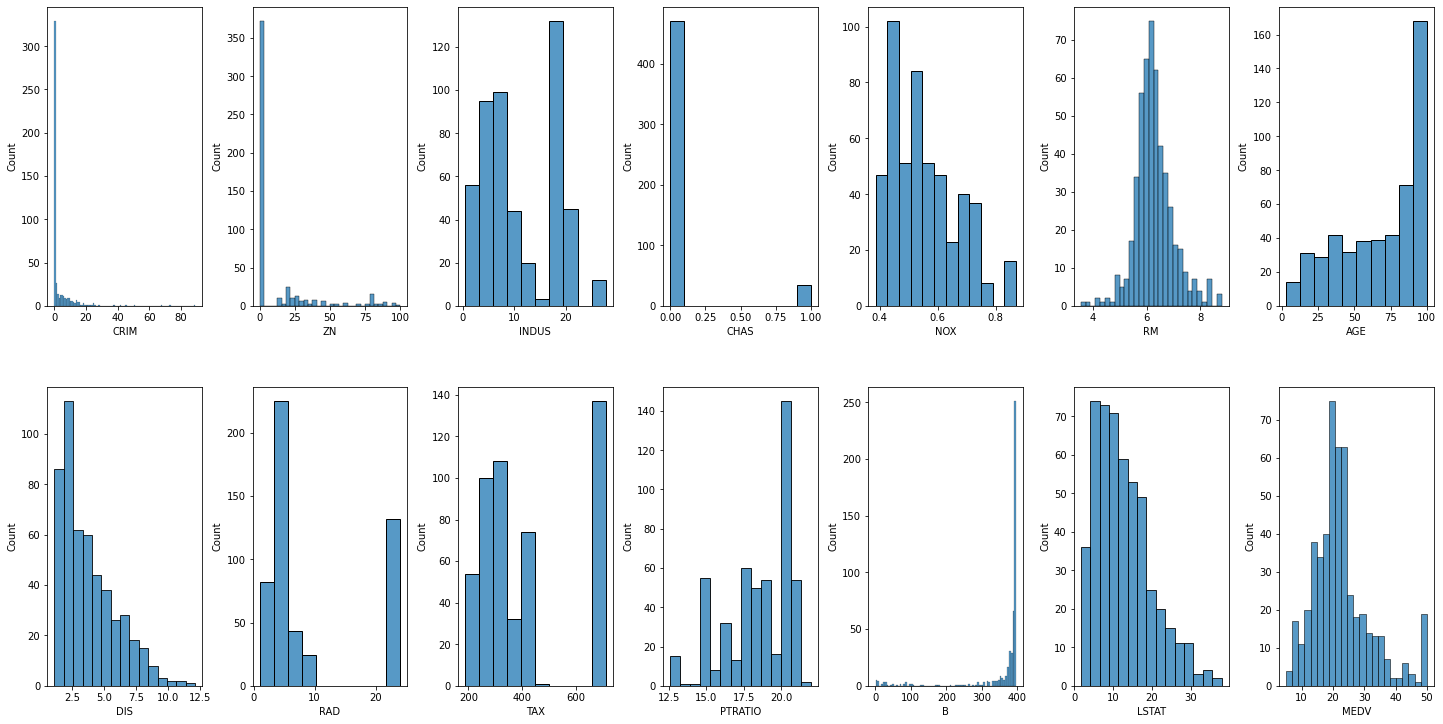

In [18]:
fig, ax = plt.subplots(ncols=7,nrows=2,figsize=(20,10))
index = 0
ax= ax.flatten()

for col,value in boston_hpp.items():
    sns.histplot(value, ax=ax[index])
    index +=1
plt.tight_layout(pad=0.5,w_pad=0.7,h_pad=5.0)

In [36]:
#MIN-MAX NORMALIZATION
cols=['CRIM','INDUS','RAD','B']
for col in cols:
    minimum= min(boston_hpp[col])
    maximum= max(boston_hpp[col])
    boston_hpp[col]=(boston_hpp[col]-minimum)/(maximum-minimum)

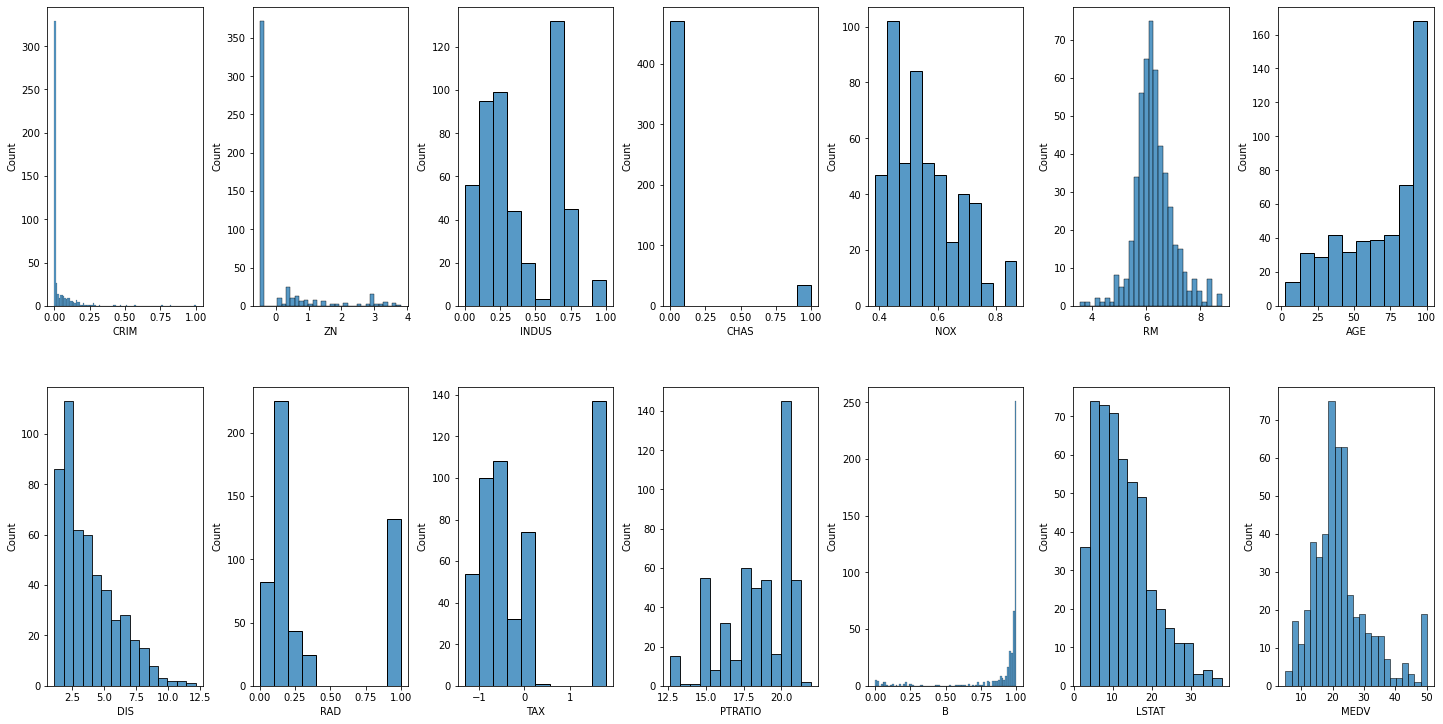

In [37]:
fig, ax = plt.subplots(ncols=7,nrows=2,figsize=(20,10))
index = 0
ax= ax.flatten()

for col,value in boston_hpp.items():
    sns.histplot(value, ax=ax[index])
    index +=1
plt.tight_layout(pad=0.5,w_pad=0.7,h_pad=5.0)

In [38]:
#UNIFORM DISTRBUTION OF MODEL : STANDARDIZATION
from sklearn import preprocessing
scalar = preprocessing.StandardScaler()

#fit our data
scal_cols=scalar.fit_transform(boston_hpp[cols])
scal_cols= pd.DataFrame(scal_cols , columns=cols)
scal_cols.sample(5)

,CRIM,INDUS,RAD,B
439,0.672301,1.015999,1.661245,0.441052
466,0.018789,1.015999,1.661245,-3.669376
139,-0.357150,1.568995,-0.637962,0.441052
164,-0.159567,1.231945,-0.523001,0.421426
252,-0.410950,-0.769931,-0.293081,0.322527


In [39]:
for col in cols:
    boston_hpp[col]= scal_cols[col]

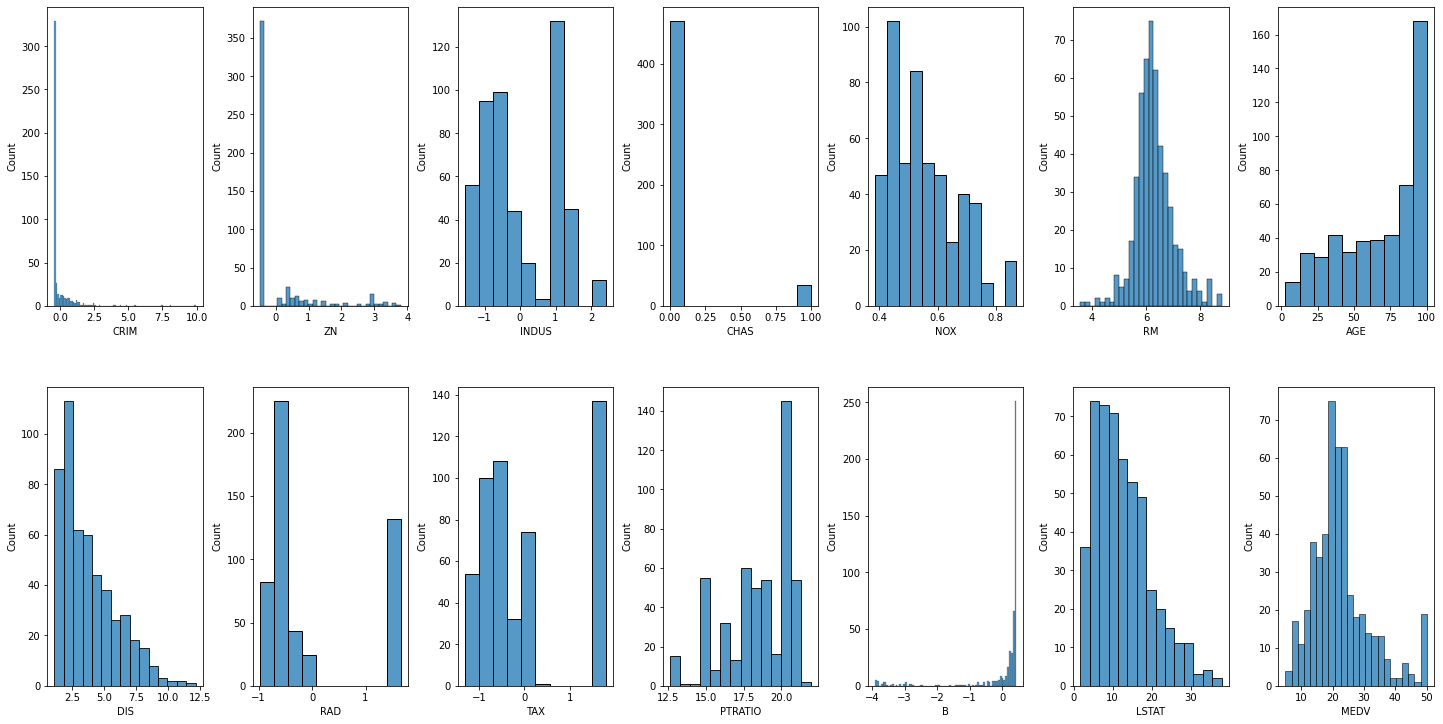

In [40]:
fig, ax = plt.subplots(ncols=7,nrows=2,figsize=(20,10))
index = 0
ax= ax.flatten()

for col,value in boston_hpp.items():
    sns.histplot(value, ax=ax[index])
    index +=1
plt.tight_layout(pad=0.5,w_pad=0.7,h_pad=5.0)

<AxesSubplot:>

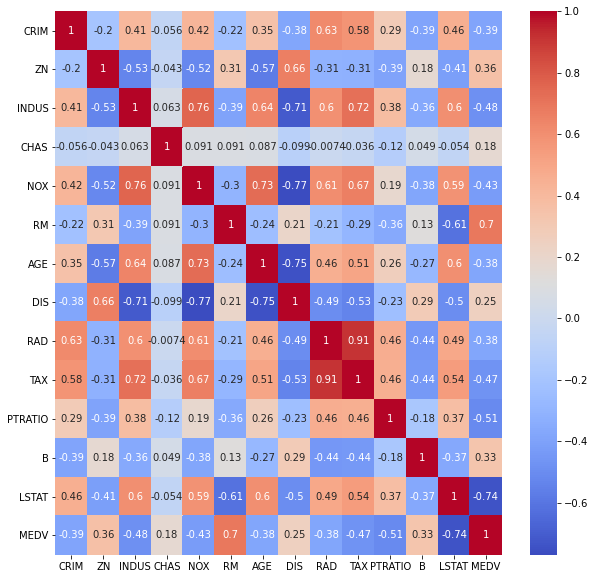

In [45]:
#CORRELATION MATRIX
corr = boston_hpp.corr()
plt.figure(figsize= (10,10))
sns.heatmap(corr,annot = True,cmap='coolwarm')

<AxesSubplot:xlabel='LSTAT', ylabel='MEDV'>

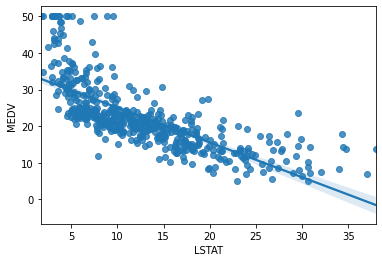

In [48]:
sns.regplot(y=boston_hpp['MEDV'],x=boston_hpp['LSTAT'])

<AxesSubplot:xlabel='RM', ylabel='MEDV'>

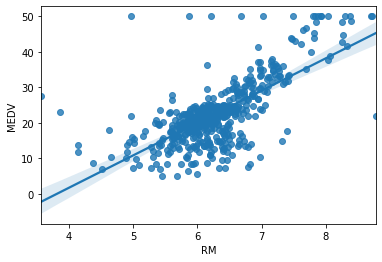

In [49]:
sns.regplot(y=boston_hpp['MEDV'],x=boston_hpp['RM'])

In [50]:
#INPUT SPLIT
X= boston_hpp.drop(columns=['MEDV','RAD'],axis=1)
y= boston_hpp['MEDV']

In [61]:
#MODEL TRAINING
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score , train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [64]:
#MODEL FITTING AND PREDICTION
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
model = LinearRegression()
mo_fit= model.fit(X_train,y_train)
pred= model.predict(X_test)

In [71]:
cv_score = cross_val_score(model, X , y , scoring='neg_mean_squared_error', cv = 5)
cv_score = np.abs(np.mean(cv_score))
    
print("MODEL REPORT")
print("MSE: " , mean_squared_error(y_test,pred))
print('MAE: ', mean_absolute_error(y_test,pred))
print('CV score: ',cv_score)

MODEL REPORT
MSE:  22.339013815006723
MAE:  3.2750106436484887
CV score:  35.581366210769154


<AxesSubplot:title={'center':'MODEL COEFFICIENTS'}>

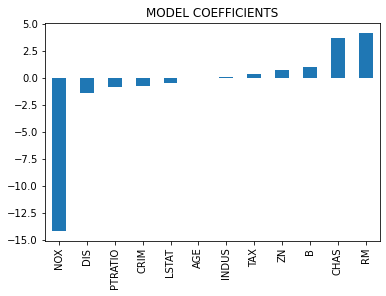

In [70]:
coef = pd.Series(model.coef_,X.columns).sort_values()
coef.plot(kind='bar',title= 'MODEL COEFFICIENTS')

In [78]:
from sklearn.ensemble import RandomForestRegressor
model1= RandomForestRegressor()

mo_fit1= model1.fit(X_train,y_train)
pred1= model1.predict(X_test)

In [79]:
cv_score = cross_val_score(model1, X , y , scoring='neg_mean_squared_error', cv = 5)
cv_score = np.abs(np.mean(cv_score))
    
print("MODEL REPORT 1")
print("MSE: " , mean_squared_error(y_test,pred))
print('MAE: ', mean_absolute_error(y_test,pred))
print('CV score: ',cv_score)

MODEL REPORT 1
MSE:  22.339013815006723
MAE:  3.2750106436484887
CV score:  21.13317099450591


LESSER THE CV SCORE VALUE BETTER THE MODEL